In [25]:
import pandas as pd
import os
import numpy as np

In [7]:
DATA_DIR = "../data/"
all_files = os.listdir(DATA_DIR)

In [45]:
last_matchs_files = max([ f for f in all_files if "Spiele_" in f])

matchs_raw = pd.read_csv(DATA_DIR + last_matchs_files, sep=';')
matchs_raw

,Tag,Datum,Zeit,Home,Away,Resultat,Drittel,OT/SO,Status,Versch.,Stadion,Zus.,TV/Online,Id,Liga,Region,Phase
0,Mi,13.09.2023,19:45,Fribourg-Gottéron,Lausanne HC,3:2,0:0|0:1|2:1|1:0,OT,Ende,False,"BCF Arena, 1700 Fribourg FR",9009,MYSPORTS,20241105000180,NL,CH,Regular Season
1,Fr,15.09.2023,19:45,HC Ambri-Piotta,SC Rapperswil-Jona Lakers,5:2,1:2|2:0|2:0,NaN,Ende,False,"Gottardo Arena, 6775 Ambri TI",6361,MYSPORTS,20241105000001,NL,CH,Regular Season
2,Fr,15.09.2023,19:45,SC Bern,Lausanne HC,4:1,1:0|0:0|3:1,NaN,Ende,False,"PostFinance Arena, 3014 Bern BE",15442,MYSPORTS,20241105000002,NL,CH,Regular Season
3,Fr,15.09.2023,19:45,HC Davos,Fribourg-Gottéron,3:4,0:0|3:1|0:3,NaN,Ende,False,"Eisstadion Davos, 7270 Davos-Platz GR",4195,MYSPORTS,20241105000003,NL,CH,Regular Season
4,Fr,15.09.2023,19:45,SCL Tigers,Genève-Servette HC,2:1,0:1|0:0|1:0|1:0,OT,Ende,False,"emmental versicherung arena , 3550 Langnau i. ...",5188,"MYSPORTS,BLICKWEBTV",20241105000004,NL,CH,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Mo,04.03.2024,19:45,EHC Kloten,HC Ambri-Piotta,-:-,-:-,NaN,Wie geplant,False,"stimo arena, 8302 Kloten ZH",0,MYSPORTS,20241105000360,NL,CH,Regular Season
360,Mo,04.03.2024,19:45,Lausanne HC,EV Zug,-:-,-:-,NaN,Wie geplant,False,"Vaudoise Aréna, 1008 Lausanne VD",0,MYSPORTS,20241105000361,NL,CH,Regular Season
361,Mo,04.03.2024,19:45,HC Lugano,SC Rapperswil-Jona Lakers,-:-,-:-,NaN,Wie geplant,False,"Cornèr Arena, 6948 Porza Ti",0,MYSPORTS,20241105000362,NL,CH,Regular Season
362,Mo,04.03.2024,19:45,Genève-Servette HC,EHC Biel-Bienne,-:-,-:-,NaN,Wie geplant,False,"Les Vernets, 1227 Les Acacias GE",0,MYSPORTS,20241105000363,NL,CH,Regular Season


In [46]:
matchs= matchs_raw[matchs_raw['Status']=='Ende'][['Datum','Home','Away',"Resultat",'OT/SO']]
matchs

,Datum,Home,Away,Resultat,OT/SO
0,13.09.2023,Fribourg-Gottéron,Lausanne HC,3:2,OT
1,15.09.2023,HC Ambri-Piotta,SC Rapperswil-Jona Lakers,5:2,NaN
2,15.09.2023,SC Bern,Lausanne HC,4:1,NaN
3,15.09.2023,HC Davos,Fribourg-Gottéron,3:4,NaN
4,15.09.2023,SCL Tigers,Genève-Servette HC,2:1,OT
...,...,...,...,...,...
286,27.01.2024,HC Lugano,Lausanne HC,4:2,NaN
287,27.01.2024,SC Rapperswil-Jona Lakers,SC Bern,3:4,SO
288,27.01.2024,Genève-Servette HC,ZSC Lions,2:5,NaN
289,27.01.2024,EV Zug,HC Ambri-Piotta,3:2,SO


In [47]:
teams = matchs['Home'].unique()
teams

array(['Fribourg-Gottéron', 'HC Ambri-Piotta', 'SC Bern', 'HC Davos',
       'SCL Tigers', 'HC Lugano', 'EV Zug', 'ZSC Lions', 'HC Ajoie',
       'EHC Biel-Bienne', 'EHC Kloten', 'Lausanne HC',
       'Genève-Servette HC', 'SC Rapperswil-Jona Lakers'], dtype=object)

In [50]:
points_per_team = dict()
points_relative = dict()
point_avg = 1.5 * np.arange(57)

for team in teams:
    team_match = matchs[(matchs['Home']==team) | (matchs['Away']==team) ]
    
    current_points = 0
    team_points = [0]
    for index, match in team_match.iterrows():
        resultat = match['Resultat'].split(':')
        if len(resultat)!=2:
            raise ValueError(f'resultat is incorrect for {team_match} : {match["Datum"]}')
        resultat = [int(score) for score in resultat]
        OT = match['OT/SO']=='OT' or match['OT/SO']=='SO'
        victory = resultat[0]>resultat[1]
        points = 3 if victory and not OT else 2 if victory else 1 if OT else 0
        if team==match['Away']:
            points = 3-points
        
        current_points+= points
        team_points += [current_points]
        
            
    points_per_team[team] = np.array(team_points)
    points_relative[team] = np.array(team_points)- point_avg[:len(team_points)]
    
points_per_team

{'Fribourg-Gottéron': array([ 0,  2,  5,  5,  8, 11, 12, 15, 18, 20, 22, 25, 28, 31, 34, 37, 37,
        40, 42, 42, 43, 44, 44, 47, 47, 47, 47, 50, 53, 56, 57, 60, 63, 63,
        66, 69, 72, 75, 78, 81, 81, 84, 87]),
 'HC Ambri-Piotta': array([ 0,  3,  6,  6,  6,  8, 11, 12, 12, 14, 14, 16, 16, 16, 19, 19, 22,
        24, 26, 29, 32, 35, 38, 38, 38, 38, 38, 38, 41, 42, 44, 47, 50, 50,
        50, 50, 50, 53, 53, 53, 55, 56]),
 'SC Bern': array([ 0,  3,  3,  6,  9, 10, 10, 13, 16, 18, 21, 21, 21, 22, 24, 26, 28,
        31, 32, 32, 34, 34, 34, 37, 40, 43, 46, 46, 49, 50, 50, 51, 52, 55,
        57, 59, 62, 62, 62, 62, 62, 65, 67]),
 'HC Davos': array([ 0,  0,  0,  3,  6,  6,  9, 12, 13, 14, 17, 20, 21, 21, 21, 21, 24,
        25, 28, 31, 31, 31, 31, 34, 34, 36, 36, 39, 39, 39, 42, 43, 45, 48,
        51, 54, 55, 57, 59, 59, 59]),
 'SCL Tigers': array([ 0,  2,  2,  2,  2,  3,  3,  5,  6,  9, 11, 14, 14, 14, 15, 16, 19,
        19, 20, 23, 26, 28, 29, 32, 35, 35, 35, 38, 41, 41, 41, 41,

In [51]:
points_relative

{'Fribourg-Gottéron': array([ 0. ,  0.5,  2. ,  0.5,  2. ,  3.5,  3. ,  4.5,  6. ,  6.5,  7. ,
         8.5, 10. , 11.5, 13. , 14.5, 13. , 14.5, 15. , 13.5, 13. , 12.5,
        11. , 12.5, 11. ,  9.5,  8. ,  9.5, 11. , 12.5, 12. , 13.5, 15. ,
        13.5, 15. , 16.5, 18. , 19.5, 21. , 22.5, 21. , 22.5, 24. ]),
 'HC Ambri-Piotta': array([ 0. ,  1.5,  3. ,  1.5,  0. ,  0.5,  2. ,  1.5,  0. ,  0.5, -1. ,
        -0.5, -2. , -3.5, -2. , -3.5, -2. , -1.5, -1. ,  0.5,  2. ,  3.5,
         5. ,  3.5,  2. ,  0.5, -1. , -2.5, -1. , -1.5, -1. ,  0.5,  2. ,
         0.5, -1. , -2.5, -4. , -2.5, -4. , -5.5, -5. , -5.5]),
 'SC Bern': array([0. , 1.5, 0. , 1.5, 3. , 2.5, 1. , 2.5, 4. , 4.5, 6. , 4.5, 3. ,
        2.5, 3. , 3.5, 4. , 5.5, 5. , 3.5, 4. , 2.5, 1. , 2.5, 4. , 5.5,
        7. , 5.5, 7. , 6.5, 5. , 4.5, 4. , 5.5, 6. , 6.5, 8. , 6.5, 5. ,
        3.5, 2. , 3.5, 4. ]),
 'HC Davos': array([ 0. , -1.5, -3. , -1.5,  0. , -1.5,  0. ,  1.5,  1. ,  0.5,  2. ,
         3.5,  3. ,  1.5,  0. , -1.5

In [68]:
import matplotlib.pyplot as plt
team_color = {
    'Fribourg-Gottéron': 'black',
    'HC Ambri-Piotta': 'darkblue',
    'SC Bern': 'maroon',
    'HC Davos': 'yellow',
    'SCL Tigers': 'orangered',
    'HC Lugano': 'grey',
    'EV Zug': 'blue',
    'ZSC Lions': 'skyblue',
    'HC Ajoie': 'gold',
    'EHC Biel-Bienne': 'orange',
    'EHC Kloten': 'darkviolet',
    'Lausanne HC': 'red',
    'Genève-Servette HC': 'firebrick',
    'SC Rapperswil-Jona Lakers': 'slateblue'
}

(0.0, 52.0)

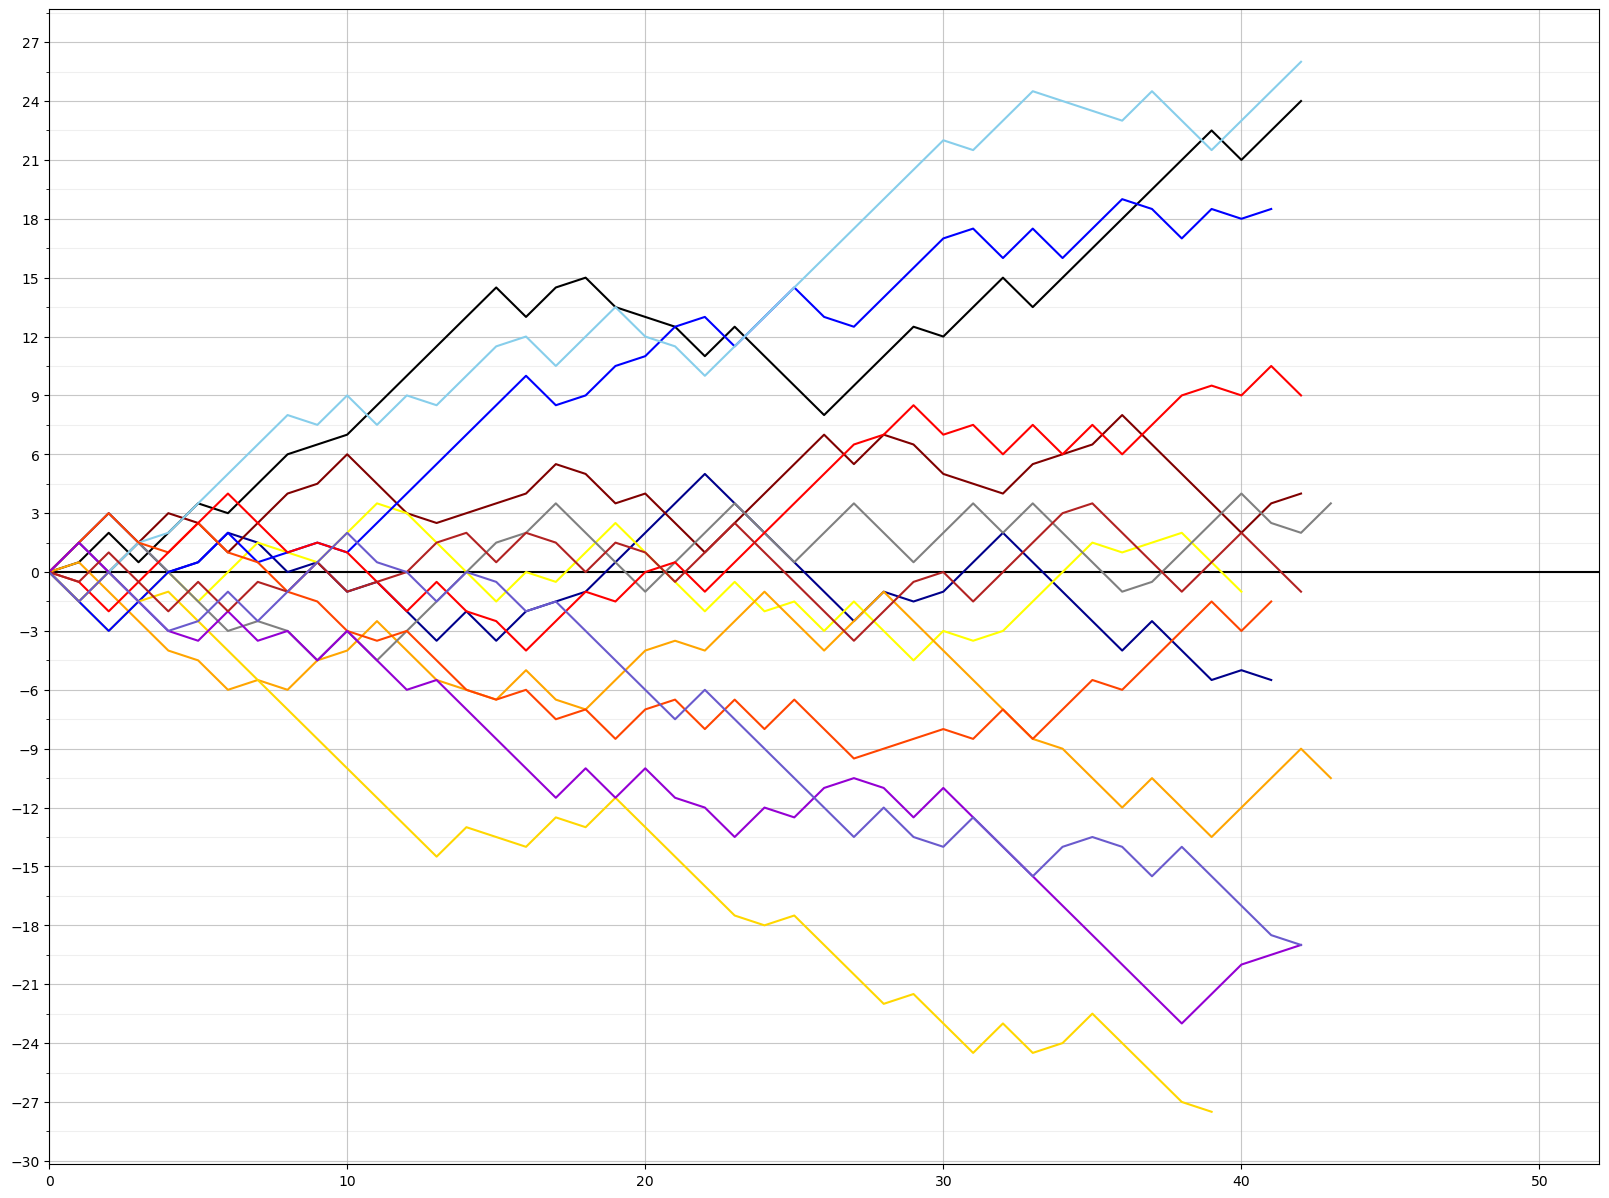

In [86]:
fig, ax = plt.subplots(figsize=(20, 15))


major_ticks = np.arange(-50*3, 101, 3)
minor_ticks = np.arange(-50*1.5, 100, 1.5)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.7)

ax.hlines(0,0,52, color='black')

for team, points in points_relative.items():
    ax.plot(points,color = team_color[team])



ax.set_xlim(xmin=0,xmax=52)

43

In [63]:
color = dict()
for team, points in points_relative.items():
    color[team]='red'

In [87]:
points_relative

{'Fribourg-Gottéron': array([ 0. ,  0.5,  2. ,  0.5,  2. ,  3.5,  3. ,  4.5,  6. ,  6.5,  7. ,
         8.5, 10. , 11.5, 13. , 14.5, 13. , 14.5, 15. , 13.5, 13. , 12.5,
        11. , 12.5, 11. ,  9.5,  8. ,  9.5, 11. , 12.5, 12. , 13.5, 15. ,
        13.5, 15. , 16.5, 18. , 19.5, 21. , 22.5, 21. , 22.5, 24. ]),
 'HC Ambri-Piotta': array([ 0. ,  1.5,  3. ,  1.5,  0. ,  0.5,  2. ,  1.5,  0. ,  0.5, -1. ,
        -0.5, -2. , -3.5, -2. , -3.5, -2. , -1.5, -1. ,  0.5,  2. ,  3.5,
         5. ,  3.5,  2. ,  0.5, -1. , -2.5, -1. , -1.5, -1. ,  0.5,  2. ,
         0.5, -1. , -2.5, -4. , -2.5, -4. , -5.5, -5. , -5.5]),
 'SC Bern': array([0. , 1.5, 0. , 1.5, 3. , 2.5, 1. , 2.5, 4. , 4.5, 6. , 4.5, 3. ,
        2.5, 3. , 3.5, 4. , 5.5, 5. , 3.5, 4. , 2.5, 1. , 2.5, 4. , 5.5,
        7. , 5.5, 7. , 6.5, 5. , 4.5, 4. , 5.5, 6. , 6.5, 8. , 6.5, 5. ,
        3.5, 2. , 3.5, 4. ]),
 'HC Davos': array([ 0. , -1.5, -3. , -1.5,  0. , -1.5,  0. ,  1.5,  1. ,  0.5,  2. ,
         3.5,  3. ,  1.5,  0. , -1.5